## Sales Analysis

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [16]:
from google.colab import files
files.upload()

Saving sales.csv to sales (1).csv


{'sales (1).csv': b'salespoints,sales\nSherpur,75964918\nSylhet,116849976\nMoulvibazar,71417315\nComilla,75959302\nChittagong,93177496\nMymensing,86731790\nGazipur,66625232\nPabna,46087330\nKhulna,62872032\nDinajpur,34650623\nCoxsbazar,62402600\nRajshahi,44019053\nJessore,55502106\nJhenaidha,53497565\nTeknaf,35718624\nFeni,44337995\nChowmuhani,31756055\nAshulia,47137959\nNarail,24549390\nSitakundo,39246978\nRangpur,47361013\nChuadanga,29122481\nNarayangonj,29191585\nHajigonj,29842208\nBrahmanbaria,39901435\nIshwardi,25946615\nNaogaon,30341016\nKeranihat,42050231\nKeranigonj,51384906\nKurigram,24673338\nMawna,29179594\nSaidpur,34979667\nKishoregonj,38647119\nTangail,27175772\nSavar,25100679\nNetrokona,26914496\nLakshmipur,21016357\nSirajganj,21556282\nJamalpur,21630974\nJoypurhat,25263318\nHathazari,32824206\nNarsingdi,21997424\nThakurgaon,23720063\nRampura,25982336\nChapainawabganj,21615264\nKustia,22591227\nLaksham,17531567\nNatore,15544412\nBogra,15839567\nSatkhira,17256137\nUttara,2

In [17]:
df = pd.read_csv('sales.csv')
df.head()

,salespoints,sales
0,Sherpur,75964918
1,Sylhet,116849976
2,Moulvibazar,71417315
3,Comilla,75959302
4,Chittagong,93177496


In [18]:
sylhet = 116849976
sylhet

116849976

In [19]:
# Lets fine Sylhet Percentile
sum(df['sales'] < sylhet ) / len(df['sales'])

0.9846153846153847

* Sylhet is performing better than 98% of other branches

In [20]:
sherpur = 75964918
sherpur

75964918

In [21]:
# Lets fine Sherpur Percentile
sum(df['sales'] < sherpur ) / len(df['sales'])

0.9230769230769231

In [22]:
# Lets fine Sylhet Percentile
sum(df['sales'] < 116849976 ) / len(df['sales'])

0.9846153846153847

* Sylhet & Sherpur percentile  > 75, so both are in 75th percentile or Upper percentile or Q3

In [23]:
import pandas as pd
# Assuming 'df' is your DataFrame
df['percentile_rank'] = df['sales'].rank(pct=True)
df

,salespoints,sales,percentile_rank
0,Sherpur,75964918,0.938462
1,Sylhet,116849976,1.000000
2,Moulvibazar,71417315,0.907692
3,Comilla,75959302,0.923077
4,Chittagong,93177496,0.984615
...,...,...,...
60,Lalmonirhat,13416284,0.138462
61,Tongi,10430634,0.046154
62,Kaptanbazar,85155833,0.953846
63,Manikganj,15806120,0.169231


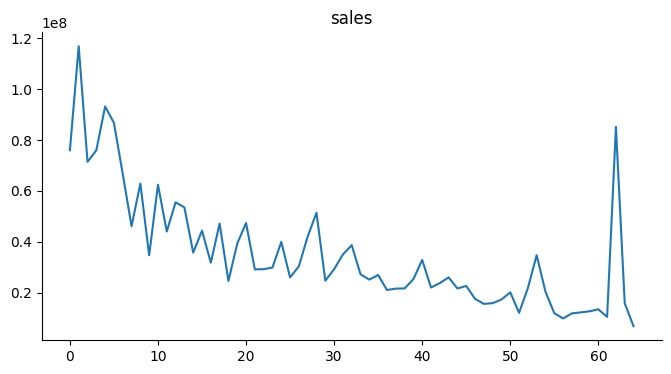

In [24]:
# @title sales

from matplotlib import pyplot as plt
df['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

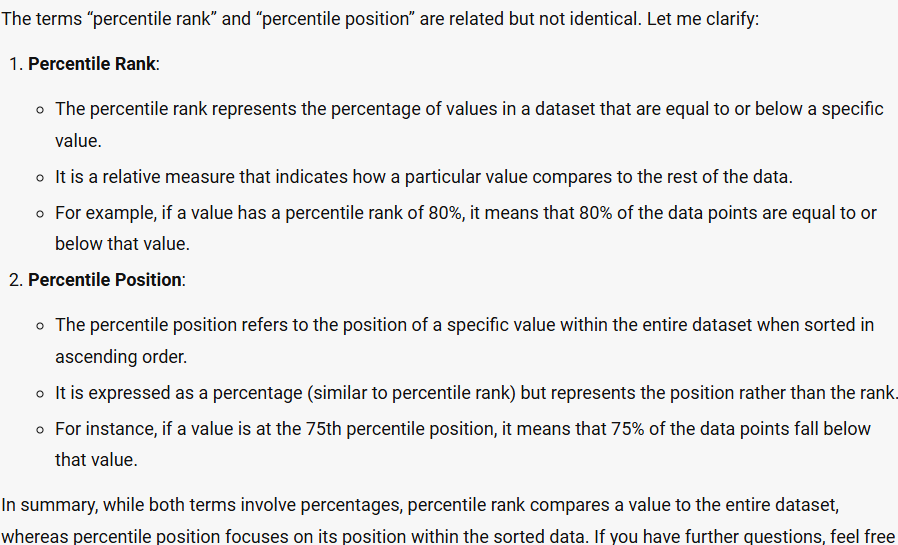

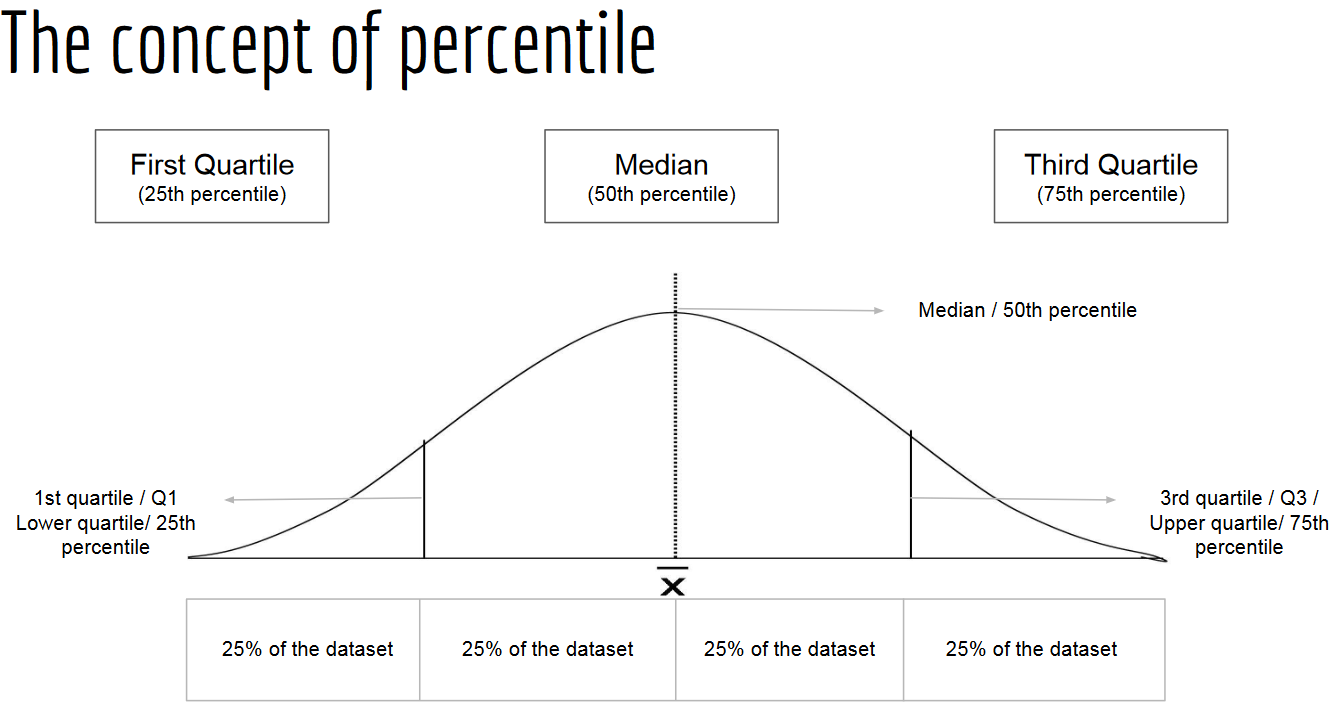

If we want to see Sylhet sales position compared to all other SC, then its percentile position, whereas if the want to see each sales center position compared to each sales center, then it’s considered to be percentile rank, for entire comparison called as rank (80% percentile rank) & whereas for a particular case called as percentile (75th percentile position) position.
Percentile Different Name:
25th Percentile:  1st Quartile / Lower Quartile / Q1 (25% of data points available is that range)
50th Percentile:  2nd Quartile / Median / Q2
75th Percentile:  3rd Quartile / Upper Quartile / Q3 (25% of data points available is that range)

We have 3 percentiles:
1. Q1 / 25th Percentile
2. Q2 / 50th Percentile (median)
3. Q3 / 75th percentile


* The concept of percentile helps to find outliers

# Outliers

<Axes: xlabel='sales'>

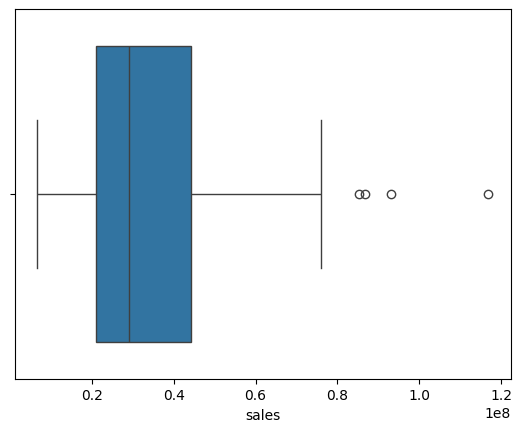

In [25]:
sns.boxplot(data= df, x='sales')

1. There are some outliers in logn tailed side
2. The values spread between left & right two line is consided to be non-outliers, whereas some dot /ball shows out of any of two lines (left & right) considered to be outliers

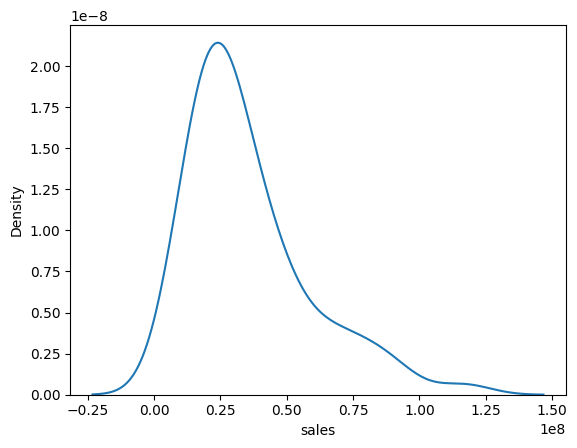

In [26]:
sns.kdeplot(data = df, x='sales')
plt.show()

# Boxplot Explation

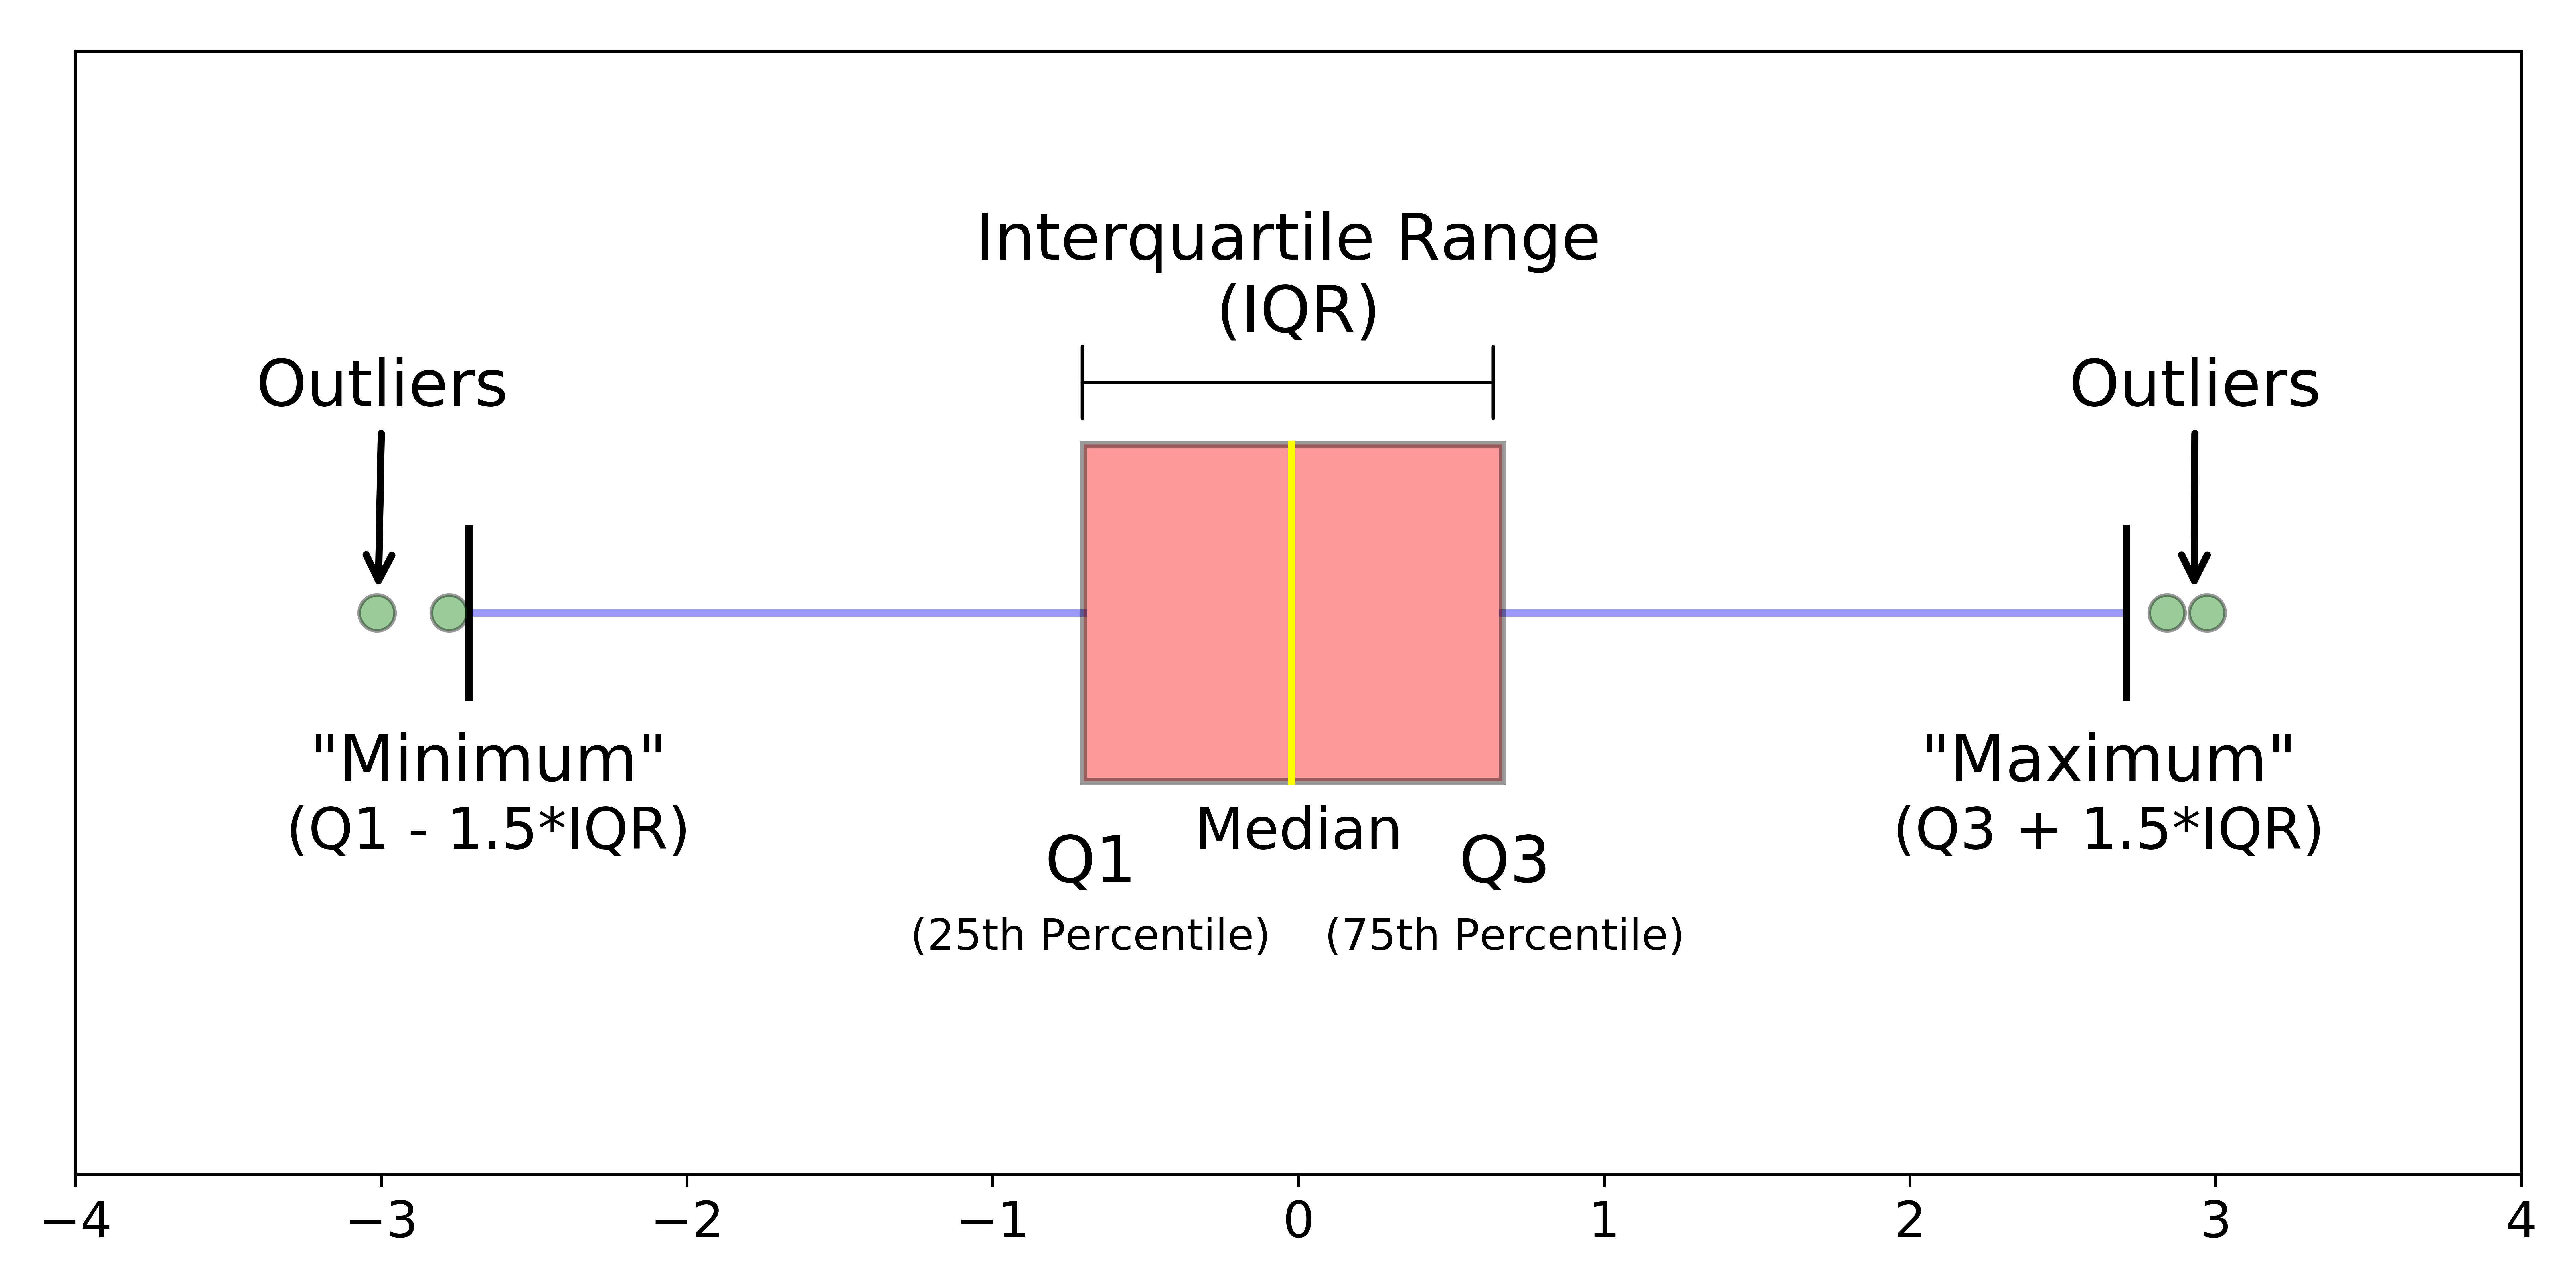

* The Long line out of Q1 & Q3, but upto two given lines is considered as Wisker or non outliers

## Lets find the skewness as result outliers

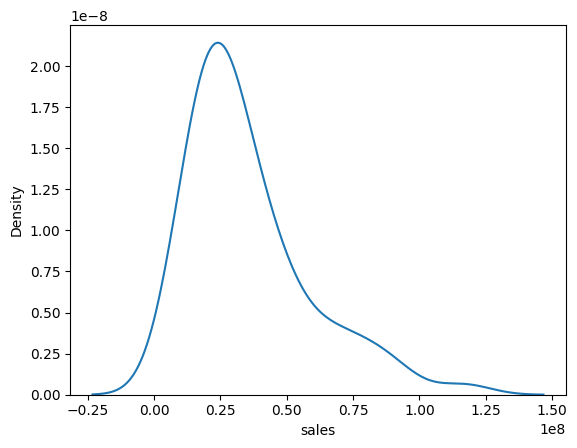

In [27]:
sns.kdeplot(data = df, x='sales')
plt.show()

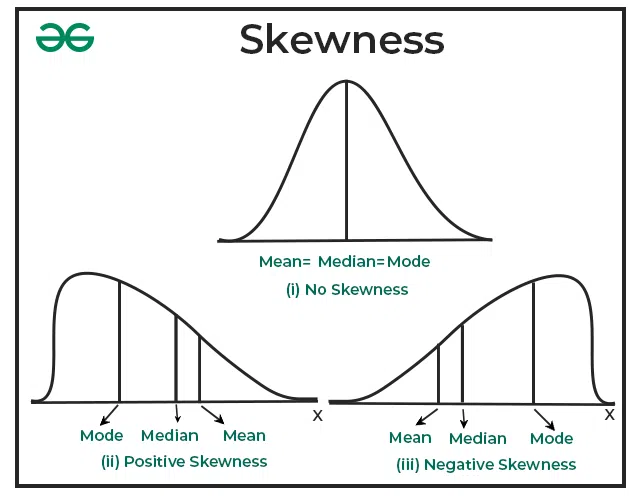

# Find Outlier Values

In [28]:
import numpy as np

q1 = np.percentile(df['sales'], 25)
q3 = np.percentile(df['sales'], 75)

iqr = q3-q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

outlier = []

for x in df['sales']:
  if ((x > upper) or (x<lower)):
    outlier.append(x)

print(outlier)

[116849976, 93177496, 86731790, 85155833]


1. We can check outlier (wheter have outlier or not) by BoxPlot
2. Boxplot shows datapoint, not shows outlier values
3. We can see outlier values by IQR Formula

## Histogram

In [30]:
df.head()

,salespoints,sales,percentile_rank
0,Sherpur,75964918,0.938462
1,Sylhet,116849976,1.000000
2,Moulvibazar,71417315,0.907692
3,Comilla,75959302,0.923077
4,Chittagong,93177496,0.984615


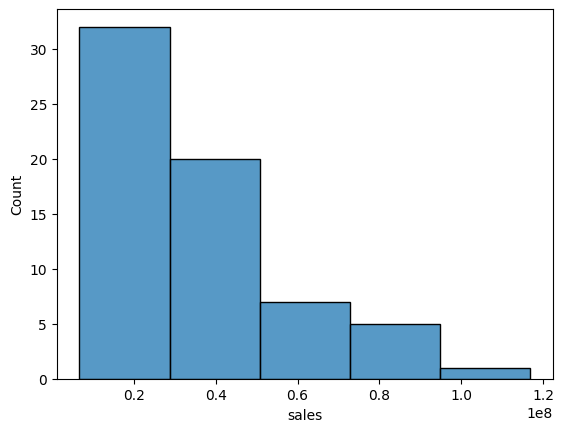

In [32]:
import seaborn as sns
sns.histplot(data=df, bins=5, x = 'sales')
plt.show()

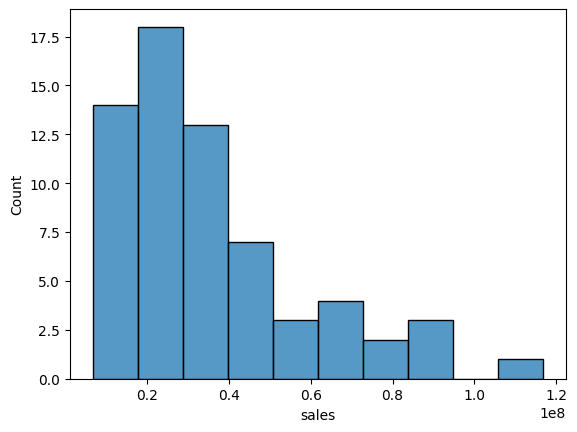

In [34]:
import seaborn as sns
sns.histplot(data=df, bins='auto', x = 'sales') #
plt.show()

In [35]:
# Find 10 to 20 Million
filtered_df = df[df['sales'].between(10e6, 20e6)]
filtered_df

,salespoints,sales,percentile_rank
46,Laksham,17531567,0.215385
47,Natore,15544412,0.153846
48,Bogra,15839567,0.184615
49,Satkhira,17256137,0.200000
51,Gaibandha,12035898,0.092308
55,Madaripur,11886705,0.076923
57,Bhola,11823622,0.061538
58,Faridpur,12209468,0.107692
59,Magura,12617027,0.123077
60,Lalmonirhat,13416284,0.138462


In [37]:
# Find 20 to 30 Million
filtered_df = df[df['sales'].between(20e6,30e6)]
filtered_df

,salespoints,sales,percentile_rank
18,Narail,24549390,0.384615
21,Chuadanga,29122481,0.507692
22,Narayangonj,29191585,0.538462
23,Hajigonj,29842208,0.553846
25,Ishwardi,25946615,0.446154
29,Kurigram,24673338,0.400000
30,Mawna,29179594,0.523077
33,Tangail,27175772,0.492308
34,Savar,25100679,0.415385
35,Netrokona,26914496,0.476923


In [38]:
# Find 40 to 50 Million
filtered_df = df[df['sales'].between(40e6,50e6)]
filtered_df

,salespoints,sales,percentile_rank
7,Pabna,46087330,0.769231
11,Rajshahi,44019053,0.738462
15,Feni,44337995,0.753846
17,Ashulia,47137959,0.784615
20,Rangpur,47361013,0.800000
27,Keranihat,42050231,0.723077


In [43]:
import pandas as pd
import plotly.graph_objects as go

# Assuming your DataFrame is named 'df' and the column containing sales values is 'value'
filtered_df = df[df['sales'].between(20e6, 30e6)]

# Display the filtered data
fig = go.Figure(data=[go.Scatter(x=filtered_df['sales'], y=filtered_df['sales'] * 100)])

# Show the figure
fig.show()